# Simple example of Jaccard index computation between 2 multi-polygons 

This notebook illustrates the computation of Jaccard similarity index between two simple multi-polygons using `shapely` and `satsense` python libraries.

 ### Creating  2 simple multi-polygons and visualizing them 

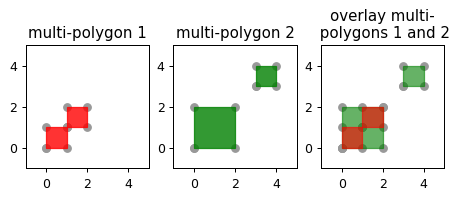

In [1]:
# Python, shapely and satsense package imports
from matplotlib import pyplot
from shapely.geometry import MultiPolygon
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons

# define the nodes of valid multi-polygons
a = [(0, 0), (0, 1), (1, 1), (1, 0), (0, 0)]
b = [(1, 1), (1, 2), (2, 2), (2, 1), (1, 1)]

multi1 = MultiPolygon([[a, []], [b, []]])

c = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
d = [(3, 3), (3, 4), (4, 4), (4, 3), (3, 3)]

multi2 = MultiPolygon([[c, []], [d, []]])

# Visualization parameters
RED = '#FF0000'
GREEN = '#008000'
al = 0.8

extent = [-1, -1, 5, 5] # format of extent is [xmin, ymin, xmax, ymax]

# Visualize the multi-polygons
fig = pyplot.figure(1, dpi=90)

ax = fig.add_subplot(131)
shmp(multi1, ax, True, extent, RED, al, 'multi-polygon 1')
ax = fig.add_subplot(132)
shmp(multi2, ax, True, extent, GREEN, al, 'multi-polygon 2')
ax = fig.add_subplot(133)
shmp(multi2, ax, True, extent, GREEN, al-0.2, '') 
shmp(multi1, ax, True, extent, RED, al-0.2, 'overlay multi-\n polygons 1 and 2')    
    
pyplot.show()

### Jaccard Index between the 2 multi-polygons

In [2]:
# Satsense package import
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation

# compute the Jaccard index
jim(multi1, multi2)


0.4